In [1]:
import sys
sys.path.append('../')
import numpy as np
from IPython.display import HTML

from rover_simulator.core import Obstacle
from rover_simulator.sensor import ImaginalSensor
from rover_simulator.world import World
from rover_simulator.rover import DwaRover
from rover_simulator.history import SimpleHistory
from rover_simulator.navigation.localizer import ImaginalLocalizer
from rover_simulator.collision_detector import CollisionDetector
from rover_simulator.navigation.controller import DwaController
from rover_simulator.navigation.mapper import GridMapper

In [2]:
world = World()
world.read_objects("../rover_simulator/examples/environment_deadend.txt")

In [3]:
sensor = ImaginalSensor(obstacles=world.obstacles, fov=np.pi)
history = SimpleHistory()
start_pose = np.array([1.0, 1.0, 0.0])
rover = DwaRover(
    start_pose, 0.5,
    sensor=sensor,
    localizer=ImaginalLocalizer(),
    history=history,
    collision_detector=CollisionDetector(world.obstacles)
)
world.append_rover(rover)

In [4]:
world.simulate(200)

  0%|          | 0/200 [00:00<?, ?it/s]

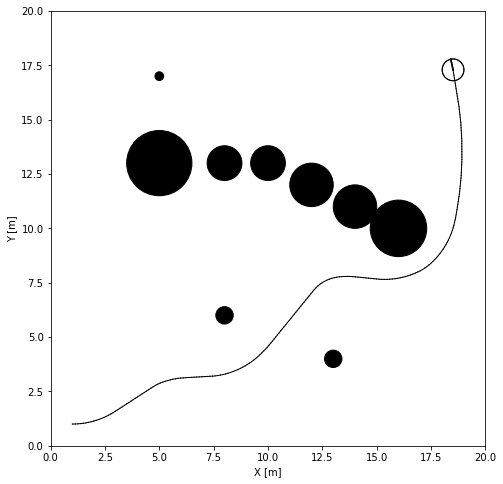

In [5]:
history.draw(
    xlim=[0, 20], ylim=[0, 20],
    obstacles=world.obstacles,
    # enlarge_range=rover.r
)

In [6]:
history.animate(
    xlim=[0, 20], ylim=[0, 20],
    start_pos=start_pose[0:2], goal_pos=rover.waypoint,
    obstacles=world.obstacles,
    # enlarge_range=rover.r
)
HTML(history.ani.to_jshtml())

  0%|          | 0/200 [00:00<?, ?it/s]